In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Optical_Ang.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-d5f417f79c76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-d5f417f79c76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


0          1          2          3          4          5  \
0  41823.715  41563.625  37476.820  41042.082  42095.730  40019.664   
1  43518.508  49504.777  44105.477  43600.540  43151.164  36914.094   
2  35669.863  34998.965  35991.562  37525.260  38528.754  37674.734   
3  39280.543  35480.996  32072.943  32681.535  33530.332  41302.000   
4  41922.047  39251.040  39793.890  39247.730  39775.805  39056.723   

           6          7          8          9  ...         18         19  \
0  47015.406  43000.530  39471.367  36874.945  ...  40521.580  38558.277   
1  43724.055  47598.996  51543.240  40687.820  ...  44826.840  40914.420   
2  35113.530  35564.855  37459.320  34255.918  ...  38394.570  40916.510   
3  38464.402  39647.945  38139.156  39574.586  ...  38144.340  41048.740   
4  38552.440  38444.996  41459.754  40050.562  ...  45682.133  43115.465   

          20         21         22         23         24         25  \
0  41658.590  39041.824  43815.758  41836.590  42522.973  42072.740   
1  41197.152  40435.797  52056.137  38308.348  38849.523  42279.547   
2  37921.105  37410.080  41592.258  34784.336  39358.715  41374.137   
3  43753.855  41195.203  42834.836  36491.535  40469.453  42898.870   
4  40289.080  39425.207  39668.312  37328.070  42138.820  41106.855   

          26  Class  
0  43587.980      1  
1  33997.140      1  
2  38443.860      1  
3  42189.152      1  
4  41546.480      1  

[5 rows x 28 columns]

In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.5)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6776315789473685
              precision    recall  f1-score   support

          -1       0.84      0.74      0.79       123
           1       0.27      0.41      0.33        29

    accuracy                           0.68       152
   macro avg       0.56      0.58      0.56       152
weighted avg       0.73      0.68      0.70       152



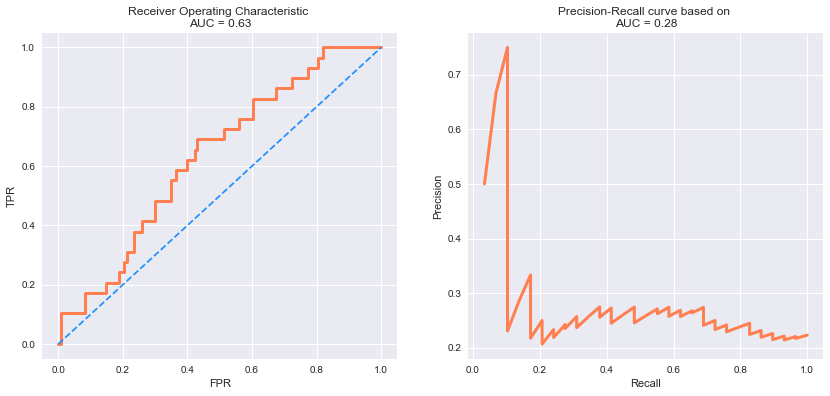

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()